# Introduction


In this homework, you'll be required to load in a dataset which has about 500 features. By using
Lasso ($L^1$) regression, we'll find the optimal constraint on the $L^1$ norm which gives us the best
$R^2$. Then we'll plot the results.

Recall we minimize the following on ** training data: $(x_i,y_i)$**

$$\min_{\beta} \frac{1}{N} \sum_{i=1}^N (y_i - \beta \cdot x_i)^2 + \lambda \|\beta \|_{L^1}.$$


Denoting $\beta_{\lambda}$ as the minimum of the above, we then choose $\lambda$ to maximize $R^2$ on **testing data: $(x_j,y_j)$**

$$ \max_{\lambda} 1 - \frac{\sum_{j} (y_j - \beta_{\lambda} \cdot x_j)^2}{\sum_j (y_j - \bar y)^2}$$


# Lasso Regularization

## Problem 1

a) Load in hw2data.csv from ../data into a pandas dataframe.

b) Set y to be the y variable in the dataframe from a and X to be the remaining features.

c) As shown in the Booking.com example, using Lasso regression, find the regularization strength
which optimizes the $R^2$. 

**Hint:** Take a range of alpha from `np.logspace(-8,-3,1000)`

d) Plot the training performance versus the testing performance, and observe whree the test performance is
maximized. I've written an outline of the code you need.

Optimal regularization parameter: 0.103396837027


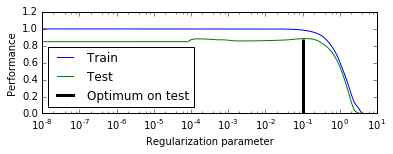

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
%matplotlib inline

df = pd.read_csv("/Users/Alex/Desktop/School/Columbia/APMA 4990/HW2/data/hw2data.csv", index_col=0, header=0)
df.head()

y = df['y']
X = df.drop(['y'], 1)

# Standardize coefficients
X = preprocessing.StandardScaler().fit_transform(X)

# Split the data and targets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.logspace(-8, 1, 2000)
train_errors = []
test_errors = []
alpha_optim = 0.0

for alpha in alphas:
    regr = Lasso(alpha=alpha)
    
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train, y_train))
    test_errors.append(regr.score(X_test, y_test))

# Choose the optimal alpha which maximizes testing performance 
alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[alpha_optim]
print "Optimal regularization parameter: %s" % alpha_optim
    
plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label='Train')
plt.semilogx(alphas, test_errors, label='Test')
plt.vlines(alpha_optim, plt.ylim()[0], np.max(test_errors), color='k', linewidth=3, label='Optimum on test')
plt.legend(loc='lower left')
plt.ylim([0, 1.2])
plt.xlabel('Regularization parameter')
plt.ylabel('Performance')

plt.show()

**Note**

For some reason, the above cell gives an error when run the first time. Please run the cell a second time and the plot will appear. The cell can take up 20 seconds to fully load.

e) Plot the top coefficients based on this optimal parameter. Why do you think so many are zero? 

Coefficients of Lasso regression using the optimal regularization parameter: 

 [ 0.37465361  0.36751686  1.64812232  1.43001534 -0.36945602  1.07904143
 -0.          0.          0.31686525  0.          0.98596167  0.54675028
 -0.          0.14538017  0.          1.5688592  -0.          0.
 -0.81493581 -2.76437943  0.4350006   0.68509074 -0.77882481  1.64300858
 -0.66240564 -0.         -0.00505711  1.27925899  0.39678674  0.29100037
  0.21410499 -0.29118251 -1.9435405   0.         -0.          0.54573182
  0.82758168 -0.22034122 -0.03610383 -0.52119802 -1.36488211 -1.4316601
  1.49291109 -0.49493952 -0.22210991 -0.71351799  0.53511859 -1.5249489  -0.
  0.          0.          0.         -0.          0.         -0.         -0.
  0.         -0.         -0.          0.          0.         -0.         -0.
  0.          0.00888124  0.         -0.         -0.         -0.
 -0.01451559  0.         -0.         -0.07092532  0.         -0.04850823
 -0.         -0.         -0.          0.         

/Users/Alex/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


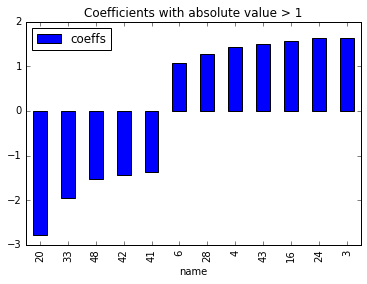

In [29]:
regr = Lasso(alpha=alpha_optim)
regr.fit(X_train, y_train)
print "Coefficients of Lasso regression using the optimal regularization parameter: \n\n %s" % regr.coef_

# Plot top coefficients (defined as coefficients with absolute value greater than 1)
df_coeffs = pd.DataFrame({'coeffs':regr.coef_, 'name':df.drop(['y'], 1).columns.values})
df_coeffs = df_coeffs.sort(['coeffs'])
df_coeffs = df_coeffs[(df_coeffs['coeffs']>1) |(df_coeffs['coeffs']<-1) ]
df_coeffs.plot(x='name', y='coeffs', kind='bar')
plt.title("Coefficients with absolute value > 1")

# Print the 10 largest positive and 10 largest negative coefficients
sorted_coef = sorted(regr.coef_)
print "\nTen largest positive coefficients: \n\n %s" % sorted_coef[-10:]
print "\nTen largest negative coefficients: \n\n %s" % sorted_coef[:10]

**Answer**

Firstly, we note that we should indeed expect that some portion of the feature coefficients will be made small or exactly zero given the nature of the $L^1$ penalty term in the Lasso model. Geometrically, the constraint boundary of the $L^1$ norm which has sharp corners along the axes (and looks like a rotated square) is more likely to intercept the level sets of the $\beta$ function at those sharp corners, leading to a "zero-ing" of coefficients. In the case of our data set, this means that the Lasso model error is minimized when many $\beta$ level sets touch the sharp corners. 

Statistically, we use the Lasso method for both selection as well as estimation of feature coefficients; thus, the largest remaining coefficients (in absolute value terms) should point to the most important features. Said another way, many of the feature coefficients end up being "zero-ed" because they are not significant (i.e., they do not meaningfully reduce the model error for a given $\lambda$ parameter). We note that the $\lambda$ parameter determines the severity with which we penalize the coefficients. If we had picked a smaller $\lambda$ (which would have not been optimal), we would have had fewer "zero-ed" coefficients.

f) Compute the $R^2$ with the optimal coefficient found above on 5 folds using cross_val_score and plot the
results. Does the model work well on all random subsets?

R^2 values for 5-fold cross-validation using the optimal regularization parameter: 
 [ 0.88183768  0.84597037  0.89862428  0.87265331  0.84698289]


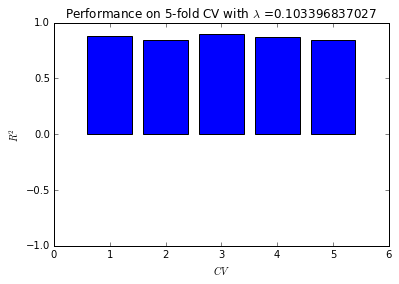

In [30]:
y = df['y']
X = df.drop(['y'], 1)

# Run 5-fold cross-validation on the Lasso regression model with the optimal lambda from part d) 
cv_errors = cross_val_score(regr, X, y, cv=5)
print "R^2 values for 5-fold cross-validation using the optimal regularization parameter: \n %s" % cv_errors 

# Plot R^2 of 5-fold cross-validation
plt.bar(range(1,6), cv_errors, align='center')
plt.ylim([-1,1])
plt.xlabel('$CV$')
plt.ylabel('$R^2$')
plt.title('Performance on 5-fold CV with $\lambda$ =' + str(alpha_optim))
plt.show()

**Answer**

Fitting the Lasso regression model with the optimal regularization parameter $\lambda = 0.103396837027$ found in part d), we infer that the model does indeed do well on all random subsets. We note that the $R^2$ values across the $5$ folds are consistent as they do not vary much given that they range between $0.85$ and $0.90$.

f) Repeat e) but using cross validation. Use error bars on the features which are the standard deviation of the 
coefficiens obtained above. For this problem I"ll walk you through the code. You just need to apply your optimal
$\alpha$ found above. 

In [31]:
from sklearn.cross_validation import KFold
from sklearn import preprocessing
def run_cv_coeffs(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y), n_folds=5, shuffle=True)
    y_pred = y.copy()
    coeffs = []
    # Iterate through folds
    for train_index, test_index in kf:
        
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train, y_train)
        y_pred[test_index] = clf.predict(X_test)
        coeffs.append(clf.coef_)
    return coeffs

scaler = preprocessing.StandardScaler()
X_scaled = X.as_matrix().astype(np.float)
X_scaled = scaler.fit_transform(X)

coeffs = run_cv_coeffs(X_scaled, np.array(y), Lasso, alpha=alpha_optim)

In [32]:
def get_coeffs(coeffs):
    coeffs_avgd = [(coeffs[0][i] + coeffs[1][i] + coeffs[2][i] + coeffs[3][i] + coeffs[4][i])/5 for i in range(0,len(X.columns))]
    coeffs_std = [np.std([coeffs[0][i],coeffs[1][i],coeffs[2][i],coeffs[3][i],coeffs[4][i]]) for i in range(0,len(X.columns))]
    return coeffs_avgd, coeffs_std
coeffs_avg,coeffs_std=get_coeffs(coeffs)

/Users/Alex/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


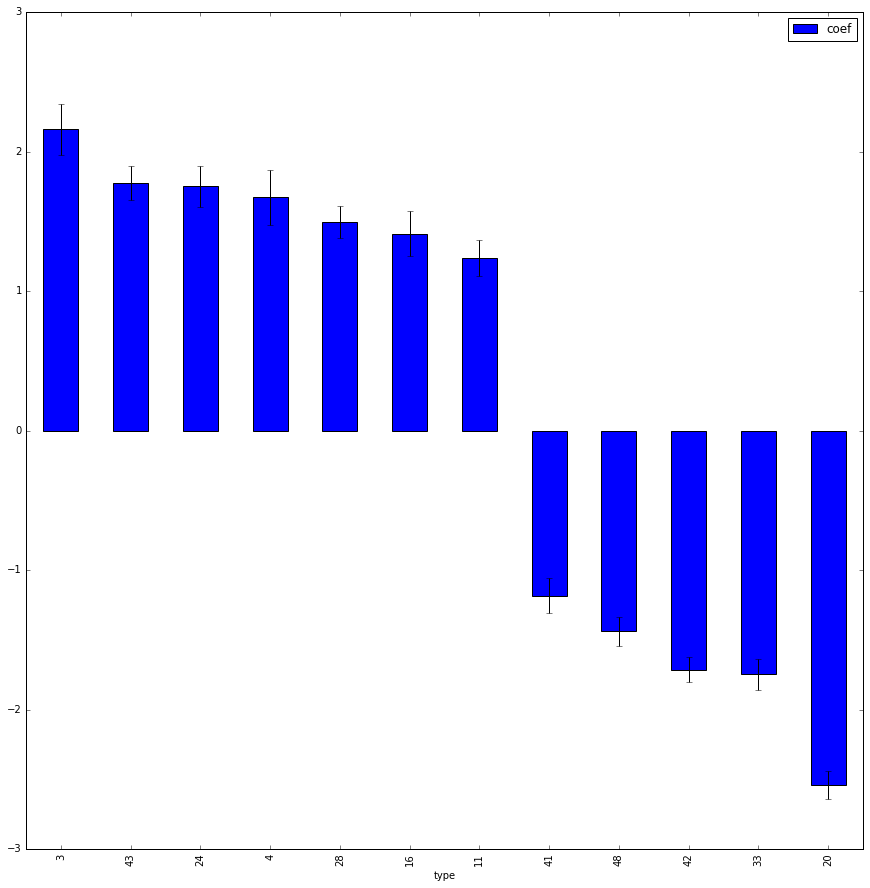

In [33]:
dfCoeffs = pd.DataFrame({'type':X.columns.values, 'coef':coeffs_avg, 'std':coeffs_std})
dfCoeffs = dfCoeffs[(dfCoeffs['coef']>1) |(dfCoeffs['coef']<-1) ]
plt.figure(figsize=(15,15))
dfCoeffs_sorted = dfCoeffs.sort(['coef'])[::-1]
yerr_vals = dfCoeffs_sorted['std'].values
dfCoeffs_sorted.plot(x='type',y='coef',kind='bar',yerr=yerr_vals,figsize=(15,15))